In [1]:
### Load data path
import os
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.dates as mdates
from datetime import datetime, timedelta


print(sys.executable)

%matplotlib ipympl


/usr/bin/python3


## Path checking

In [8]:
!ls "/tf/data"

ASM_module  cecilie  ec  lawance  waterSensor  wendy


In [9]:
ls

 aryData/                  'defbuffer0628 1740.csv'*
 conAng.svg                'defbuffer0628 2030.csv'*
 contactAngle.ipynb        'defbuffer0628 2130.csv'*
'defbuffer0619 1613.csv'*  'defbuffer1  DI_01Act_DI.csv'*
'defbuffer0619 2150.csv'*  'defbuffer1 0D1 10.csv'*
'defbuffer0624 1640.csv'*   exportSvg/
'defbuffer0624 1941.csv'*   gui/
'defbuffer0624 2037.csv'*   gui.zip*
'defbuffer0626 1755.csv'*   tempplateKeyf.csv
'defbuffer0626 2246.csv'*   untitled.txt
'defbuffer0627 1640.csv'*   water.ipynb*
'defbuffer0627 2250.csv'*   water3x3.ipynb


## Raw data

### Read Data

#### Select file name

In [8]:
testingTime = '20250328_175223'
cumTimeOffset = 0

In [9]:
testingTime = '20250328_195930'
cumTimeOffset = 0

In [48]:
testingTime = '20250405_152759'
cumTimeOffset = 0#-10

In [7]:
testingTime = '20250405_184540'
cumTimeOffset = 0#-10

In [2]:
testingTime = '20250407_145016'
cumTimeOffset = 0#-10

#### Read CSVs

In [3]:
csvFile = '/tf/data/waterSensor/aryData/sensor_'+testingTime+'.csv'
colnames = ['time']+[f'px{i}' for i in range(9)]
print(colnames)

testingCsvFile = 'aryData/testing_'+testingTime+'.txt'
sequenceCsvFile = '/tf/data/waterSensor/aryData/pump_sequence_'+testingTime+'.csv'

['time', 'px0', 'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8']


14:46 073 0
14:52 113 0
14:59 203 0
15:05 303 0
15:11 076 0
15:17 116 0
15:23 206 0
15:30 306 0
15:35 073 0.1
15:41 113 0.1
15:47 203 0.1
15:53 303 0.1
15:59 076 0.1
16:05 116 0.1
16:11 206 0.1
16:17 306 0.1
16:23 073 0
16:28 073 0.5
16:35 113 0.5
16:41 113 0.5
16:48 203 0.5
16:55 303 0.5
16:51 076 0.5
17:06 116 0.5
17:12 206 0.5
17:18 306 0.5
17:24 073 0

### Read Sensor Data

In [4]:
#Sensor data
df=pd.read_csv(csvFile, names=colnames, header=None)

df['datetime'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S%z').dt.tz_localize(None)
df = df.set_index(['datetime'])
df = df.drop('time', axis=1)
df

,px0,px1,px2,px3,px4,px5,px6,px7,px8
datetime,,,,,,,,,
2025-04-07 14:50:17,1348,2042,3804,2410,2401,3802,2757,2942,3804
2025-04-07 14:50:18,1348,2046,3805,2402,2396,3806,2763,2945,3804
2025-04-07 14:50:19,1348,2041,3806,2410,2399,3807,2759,2941,3806
2025-04-07 14:50:20,1347,2044,3806,2406,2397,3804,2761,2945,3803
2025-04-07 14:50:21,1346,2041,3805,2410,2399,3804,2757,2945,3805
...,...,...,...,...,...,...,...,...,...
2025-04-07 16:16:51,1344,2040,3806,2315,2308,3808,2716,2905,3805
2025-04-07 16:16:51,1343,2036,3805,2323,2302,3804,2715,2907,3807
2025-04-07 16:16:52,1342,2037,3807,2322,2306,3807,2716,2904,3807


In [13]:
for i in range(9):
    df[f'resp{i}'] = df[f'px{i}'] - df[f'px{i}'].iloc[0]
df

,px0,px1,px2,px3,px4,px5,px6,px7,px8,resp0,resp1,resp2,resp3,resp4,resp5,resp6,resp7,resp8
datetime,,,,,,,,,,,,,,,,,,
2025-04-07 14:50:17,1348,2042,3804,2410,2401,3802,2757,2942,3804,0,0,0,0,0,0,0,0,0
2025-04-07 14:50:18,1348,2046,3805,2402,2396,3806,2763,2945,3804,0,4,1,-8,-5,4,6,3,0
2025-04-07 14:50:19,1348,2041,3806,2410,2399,3807,2759,2941,3806,0,-1,2,0,-2,5,2,-1,2
2025-04-07 14:50:20,1347,2044,3806,2406,2397,3804,2761,2945,3803,-1,2,2,-4,-4,2,4,3,-1
2025-04-07 14:50:21,1346,2041,3805,2410,2399,3804,2757,2945,3805,-2,-1,1,0,-2,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07 16:16:51,1344,2040,3806,2315,2308,3808,2716,2905,3805,-4,-2,2,-95,-93,6,-41,-37,1
2025-04-07 16:16:51,1343,2036,3805,2323,2302,3804,2715,2907,3807,-5,-6,1,-87,-99,2,-42,-35,3
2025-04-07 16:16:52,1342,2037,3807,2322,2306,3807,2716,2904,3807,-6,-5,3,-88,-95,5,-41,-38,3


#### Plot sensor

KeyError: 'resp0'

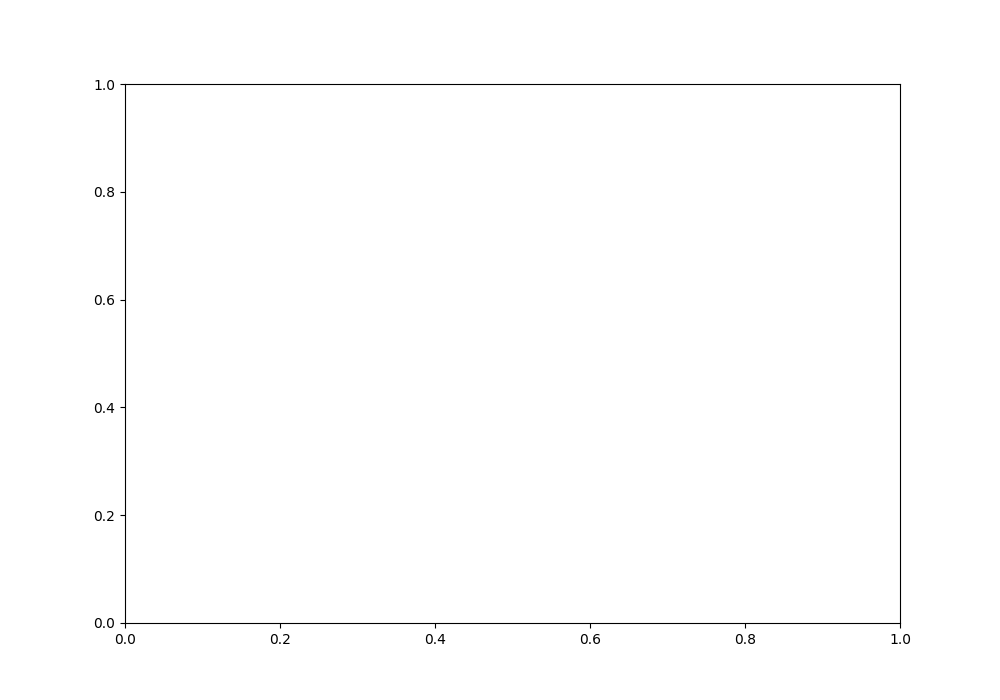

In [6]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,7))

thisAx=ax
for i in range(9):
    df.plot(ax=thisAx, y=f'resp{i}', lw=0.5) #, alpha = (i+1)/9, color='black'

thisAx.set_ylabel("adc",color="blue",fontsize=14)



thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(10))

thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_xlim(df.index[0],df.index[-1])

fig.tight_layout()

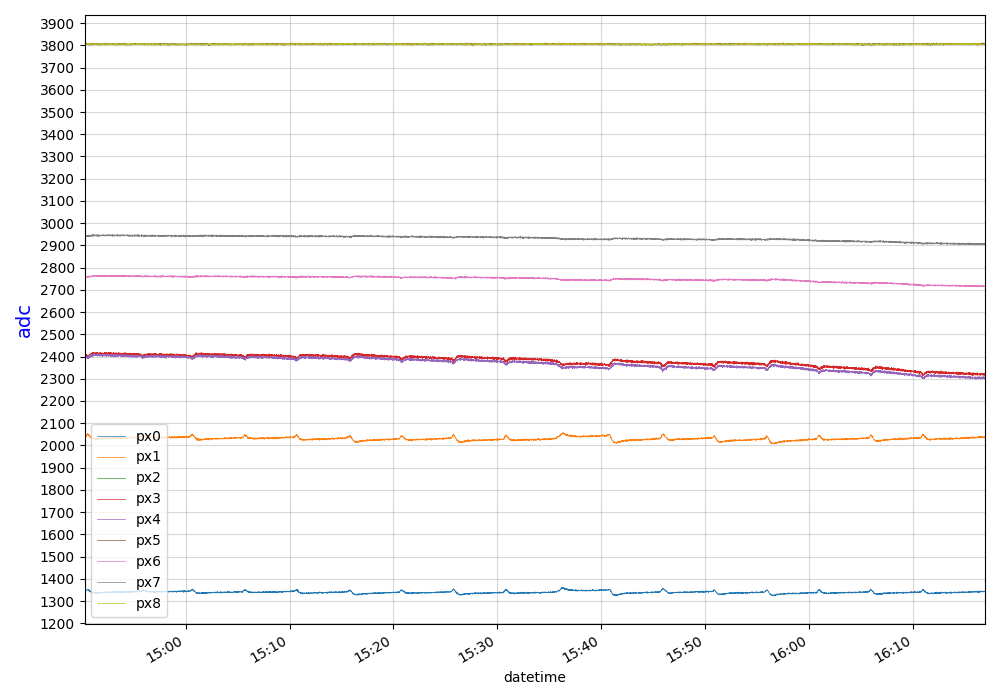

In [9]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,7))

thisAx=ax
for i in range(9):
    df.plot(ax=thisAx, y=f'px{i}', lw=0.5) #, alpha = (i+1)/9, color='black'

thisAx.set_ylabel("adc",color="blue",fontsize=14)



thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(100))

thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_xlim(df.index[0],df.index[-1])

fig.tight_layout()

### Read sequence data

In [10]:
#Sensor data
seq_df=pd.read_csv(sequenceCsvFile, usecols=['Time(s)']+[f"Pump {i+1} (rpm)" for i in range(6)])
seq_df['cumTime'] = seq_df['Time(s)'].cumsum(axis = 0)
seq_df = seq_df.rename(columns=dict(zip([f"Pump {i+1} (rpm)" for i in range(6)], [f"Pump{i+1}" for i in range(6)])))
seq_df = pd.DataFrame(
    data=seq_df.values.repeat(2, axis=0),  # Repeat each row twice
    columns=seq_df.columns                # Keep the column names
)

cumTimes = seq_df["cumTime"].values
for i in range(1, len(cumTimes), 2):
    if i + 1 < len(cumTimes):
        cumTimes[i] = cumTimes[i + 1] - 1
    else:
        cumTimes[i] = -1  # For the last duplicated row, no next row exists
seq_df["cumTime"] = seq_df["cumTime"]-seq_df["cumTime"][0]+cumTimeOffset
value_columns = [f"Pump{i}" for i in range(1, 6)]
# Scan rows and update only the value columns where all are 0
for i in range(1, len(seq_df)):  # Start from the second row (index 1)
    if (seq_df.loc[i, value_columns] == 0).all():  # Check if all value columns are 0
        seq_df.loc[i, value_columns] = seq_df.loc[i - 1, value_columns]  # Copy only value columns 
seq_df["timestamp"] = seq_df["cumTime"].apply(lambda x: df.index[0] + timedelta(seconds=x) if x >= 0 else None)
seq_df.set_index("timestamp", inplace=True)
# seq_df['id'] = np.linspace(0, seq_df.shape[0]-1, seq_df.shape[0], dtype=int)
seq_df[0:20]

,Time(s),Pump1,Pump2,Pump3,Pump4,Pump5,Pump6,cumTime
timestamp,,,,,,,,
2025-04-07 14:50:17,5,0,0,0,0,0,0,0
2025-04-07 14:50:21,5,0,0,0,0,0,0,4
2025-04-07 14:50:22,5,0,0,0,0,0,-200,5
2025-04-07 14:51:06,5,0,0,0,0,0,-200,49
2025-04-07 14:51:07,45,150,0,0,0,0,-200,50
2025-04-07 14:51:21,45,150,0,0,0,0,-200,64
2025-04-07 14:51:22,15,150,0,0,0,0,-200,65
2025-04-07 14:55:21,15,150,0,0,0,0,-200,304
2025-04-07 14:55:22,240,150,0,0,0,0,0,305


In [29]:
seq_df

,Time(s),Pump1,Pump2,Pump3,Pump4,Pump5,Pump6,cumTime
timestamp,,,,,,,,
2025-04-05 18:45:41,5,0,0,0,0,0,0,0
2025-04-05 18:45:45,5,0,0,0,0,0,0,4
2025-04-05 18:45:46,5,0,0,0,0,0,-200,5
2025-04-05 18:46:30,5,0,0,0,0,0,-200,49
2025-04-05 18:46:31,45,150,0,0,0,0,-200,50
...,...,...,...,...,...,...,...,...
2025-04-05 20:06:45,45,150,0,0,0,0,-200,4864
2025-04-05 20:06:46,15,150,0,0,0,0,-200,4865
2025-04-05 20:10:45,15,150,0,0,0,0,-200,5104


In [180]:
seq_df.to_csv('tempplateKeyf.csv')

#### Plot sequence

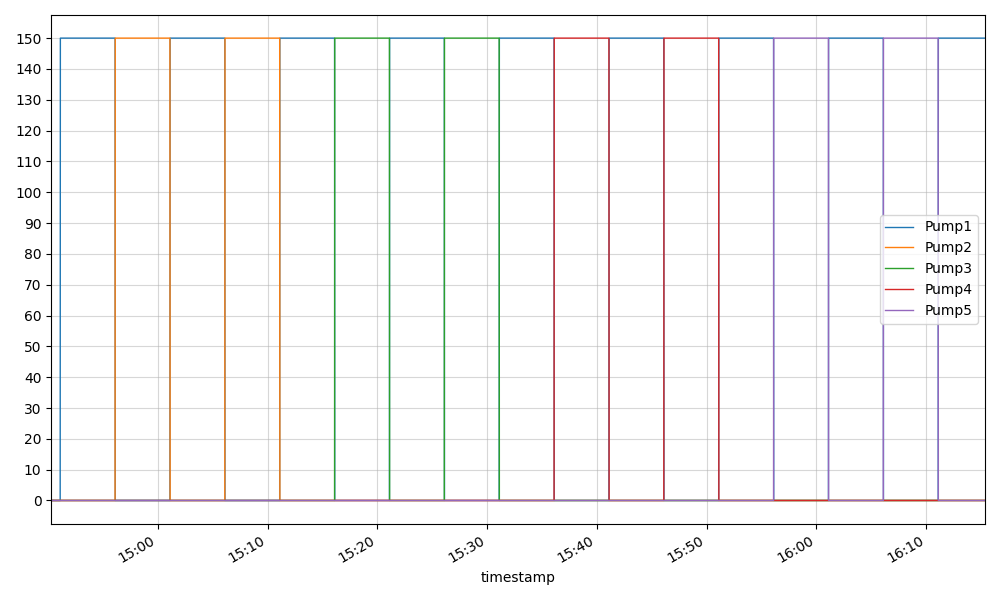

In [11]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))

thisAx=ax
# seq_df.plot(ax=thisAx,x='timestamp', y='Pump1', lw=0.5)
for i in range(5):
    seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=1)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(10))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
thisAx.set_xlim(seq_df.index[0],seq_df.index[-2])

fig.tight_layout()

### Plot both Sensor & Sequence

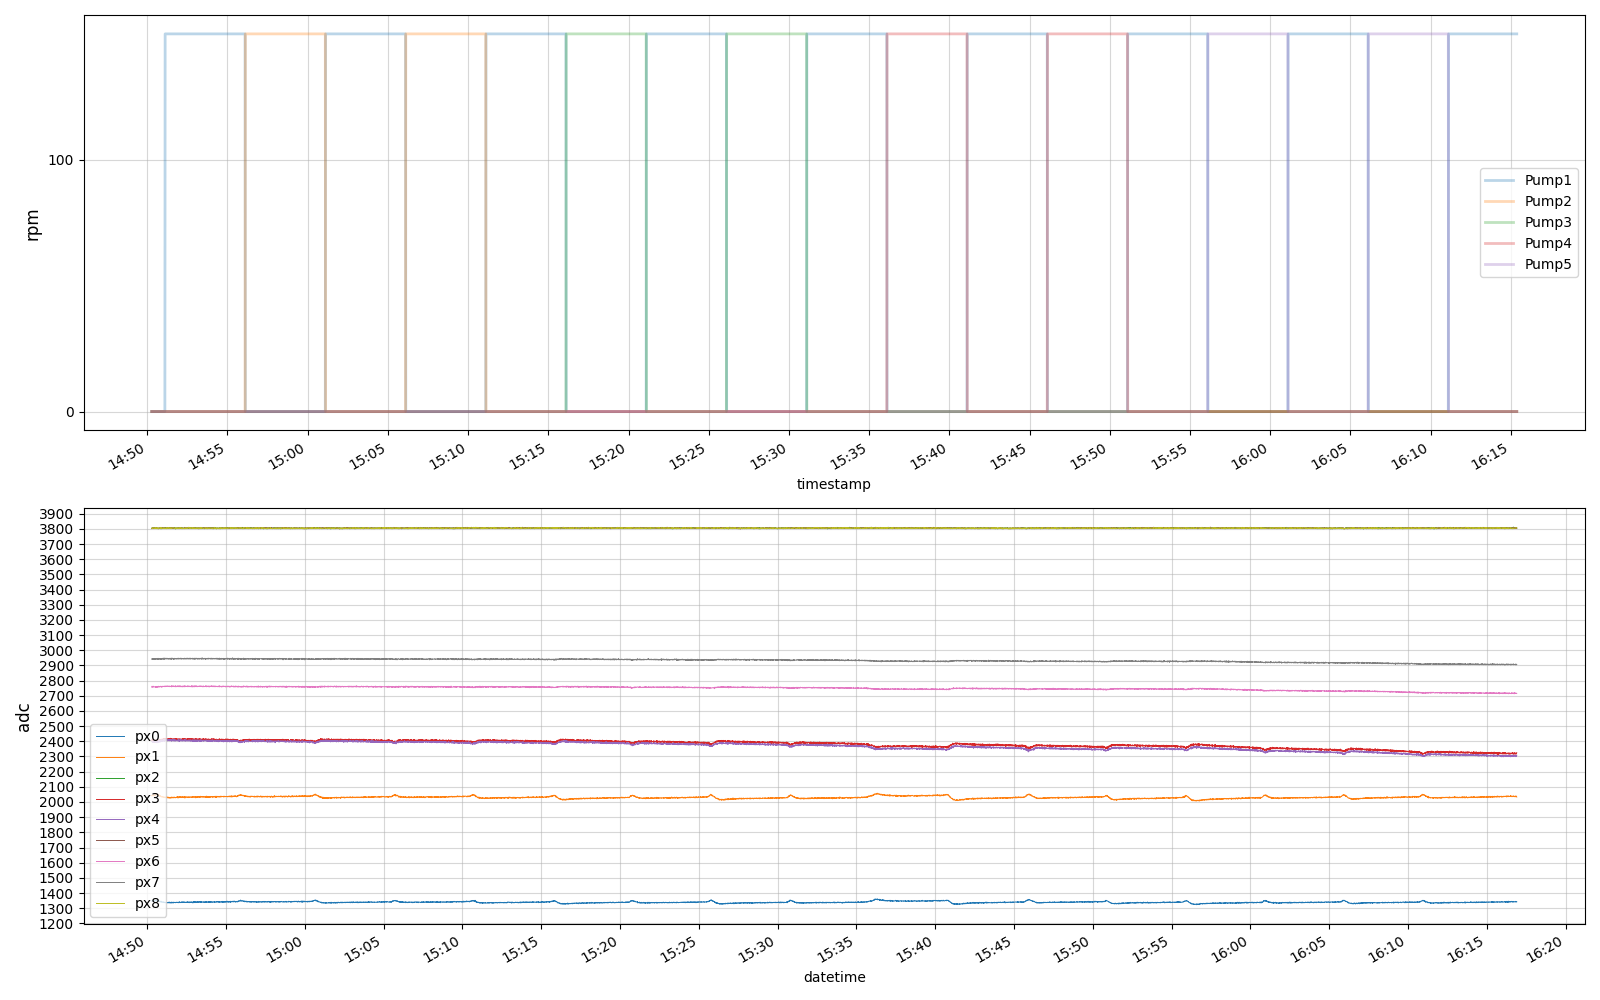

In [12]:
plt.close('all')
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(16,10))

thisAx=ax[0]
for i in range(5):
    seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=2, alpha=0.3)
    
thisAx.set_ylabel("rpm",fontsize=12)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(100))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))

thisAx=ax[1]


for i in range(9):
    df.plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'
thisAx.set_ylabel("adc",fontsize=12)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(100))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.tight_layout()

In [13]:
keyFrameId = [10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 76, 82, 88, 94, 100, ]
# keyFrameId = [10, 16,  28, 34, 40,  52, 58, 64, 70, 76, 82, 88, 94, 100, ]
keyFrameId = [key-1 for key in keyFrameId]

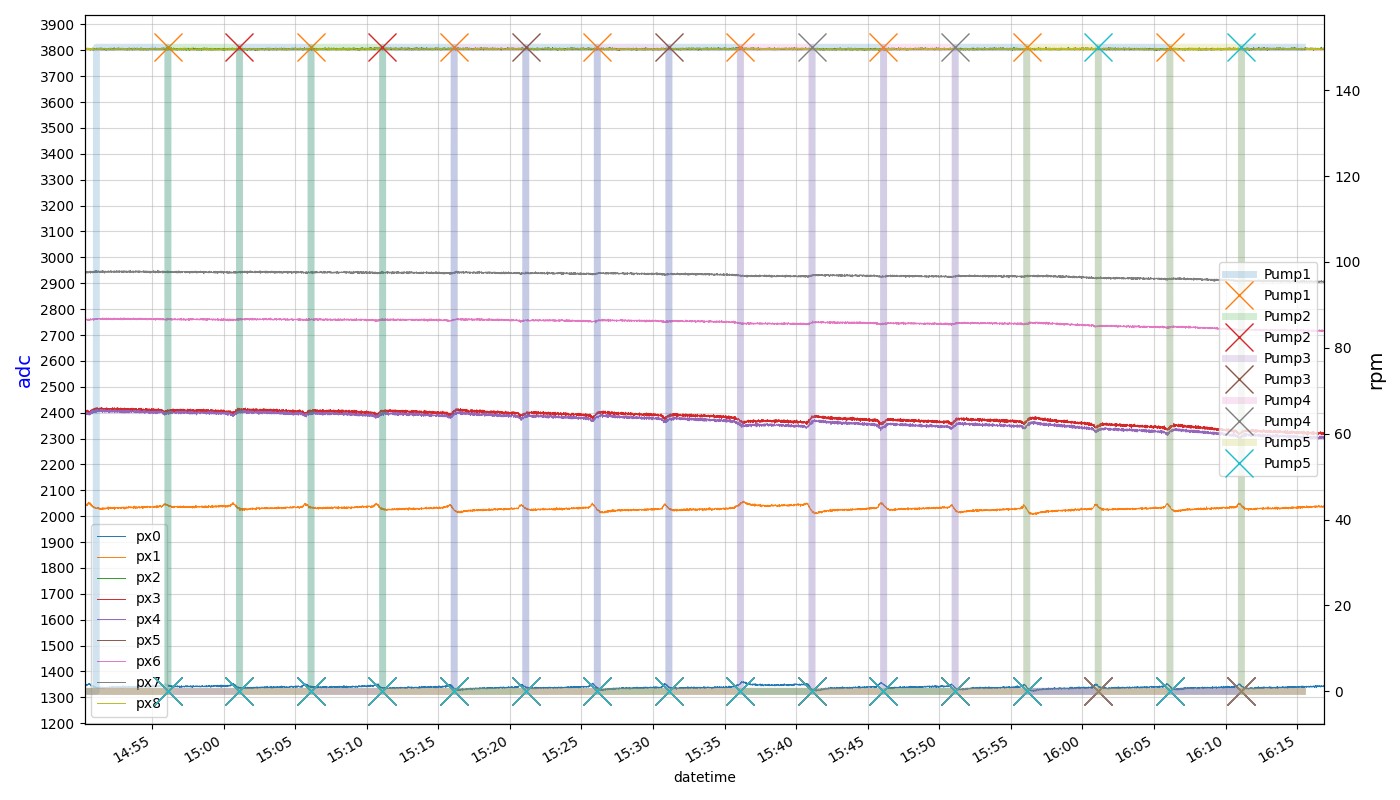

In [14]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,8))

thisAx=ax
for i in range(9):
    df.plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'

    
thisAx.set_ylabel("adc",color="blue",fontsize=14)



thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
thisAx.yaxis.set_major_locator(MultipleLocator(100))
# thisAx.xaxis.set_major_locator(MultipleLocator(150))
thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))

thisAx=thisAx.twinx()
thisAx.set_ylabel("rpm",fontsize=14)
for i in range(5):
    seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=5, alpha=0.2)
    # seq_df.plot(ax=thisAx, y=f'Pump{i+1}', lw=0.0, marker='x', ms=20, alpha=0.8)
    # seq_df.iloc[1::4].plot(ax=thisAx, y=f'Pump{i+1}', lw=0.0, marker='x', ms=20, alpha=0.8)
    seq_df.iloc[keyFrameId].plot(ax=thisAx, y=f'Pump{i+1}', lw=0.0, marker='x', ms=20, alpha=1)

thisAx.set_xlim(df.index[0],df.index[-1])
fig.tight_layout()

### Get Key frame

In [79]:
seq_df.loc[seq_df.iloc[1::4].index.dropna()].drop(['Pump6','Time(s)', 'cumTime'], axis=1)

,Pump1,Pump2,Pump3,Pump4,Pump5
timestamp,,,,,
2025-04-05 15:28:04,0,0,0,0,0
2025-04-05 15:28:44,200,0,0,0,0
2025-04-05 15:31:34,200,0,0,0,0
2025-04-05 15:33:04,0,200,0,0,0
2025-04-05 15:33:44,200,0,0,0,0
2025-04-05 15:36:34,200,0,0,0,0
2025-04-05 15:38:04,0,200,0,0,0
2025-04-05 15:38:44,200,0,0,0,0
2025-04-05 15:41:34,200,0,0,0,0


In [15]:
key_df = df.loc[seq_df.iloc[keyFrameId].index.dropna()]
key_df = pd.concat([key_df, seq_df.loc[seq_df.iloc[keyFrameId].index.dropna()].drop(['Pump6','Time(s)', 'cumTime'], axis=1)], axis=1)
key_df['ts'] = key_df.index
key_df = key_df.reset_index(drop=True)
key_df

,px0,px1,px2,px3,px4,px5,px6,px7,px8,resp0,...,resp5,resp6,resp7,resp8,Pump1,Pump2,Pump3,Pump4,Pump5,ts
0,1348,2044,3802,2401,2397,3805,2765,2940,3804,0,...,3,8,-2,0,150,0,0,0,0,2025-04-07 14:56:06
1,1346,2041,3807,2409,2398,3803,2758,2948,3807,-2,...,1,1,6,3,150,0,0,0,0,2025-04-07 14:56:06
2,1336,2030,3805,2405,2400,3806,2764,2946,3806,-12,...,4,7,4,2,0,150,0,0,0,2025-04-07 15:01:06
3,1340,2032,3807,2405,2399,3803,2759,2942,3805,-8,...,1,2,0,1,150,0,0,0,0,2025-04-07 15:06:06
4,1338,2025,3806,2405,2402,3808,2756,2941,3807,-10,...,6,-1,-1,3,0,150,0,0,0,2025-04-07 15:11:06
5,1334,2025,3805,2407,2393,3806,2759,2941,3806,-14,...,4,2,-1,2,150,0,0,0,0,2025-04-07 15:16:06
6,1340,2034,3806,2394,2380,3802,2759,2943,3805,-8,...,0,2,1,1,0,0,150,0,0,2025-04-07 15:21:06
7,1343,2031,3805,2394,2391,3805,2759,2938,3806,-5,...,3,2,-4,2,0,0,150,0,0,2025-04-07 15:21:06
8,1332,2025,3808,2402,2383,3806,2753,2939,3807,-16,...,4,-4,-3,3,150,0,0,0,0,2025-04-07 15:26:06
9,1339,2030,3806,2389,2370,3809,2754,2935,3807,-9,...,7,-3,-7,3,0,0,150,0,0,2025-04-07 15:31:06


In [6]:
#Testing schedule
colnames_testing = ['time', 'filter', 'conc']
df_testing = pd.read_csv(testingCsvFile, names=colnames_testing, header=None, sep=' ' )
df_testing['datetime'] = pd.to_datetime(str(df.index[0].date())+ ' '+ df_testing['time'], format='%Y-%m-%d %H:%M')
# df_testing = df_testing.set_index(['datetime'])
# df_testing = df_testing.drop('time', axis=1)
df_testing

,time,filter,conc,datetime
0,17:03,303,0.0,2025-03-22 17:03:00
1,17:35,303,0.5,2025-03-22 17:35:00
2,17:41,303,0.0,2025-03-22 17:41:00
3,17:48,303,1.0,2025-03-22 17:48:00
4,17:54,303,0.0,2025-03-22 17:54:00
5,18:02,303,0.5,2025-03-22 18:02:00
6,18:08,303,0.0,2025-03-22 18:08:00
7,18:14,303,1.0,2025-03-22 18:14:00
8,18:20,303,0.0,2025-03-22 18:20:00


In [7]:
keyFrame = []
for idx, testTime in df_testing.iterrows():
    keyFrame.append(df.loc[testTime['datetime']+timedelta(seconds=60):testTime['datetime']+timedelta(seconds=120)].mean().to_numpy())

## Plot Array frame

In [18]:
gasMat = key_df.iloc[0][[f'px{i}' for i in range(9)]].to_numpy()
gasMat = np.reshape(gasMat, (-1,3)).astype(int)
gasMat

array([[1348, 2044, 3802],
       [2401, 2397, 3805],
       [2765, 2940, 3804]])

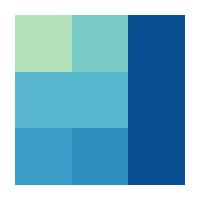

In [19]:
plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(2,2))
thisAx=ax
ax.imshow(gasMat, cmap = 'GnBu', vmin=0, vmax=4000, interpolation='nearest') #
ax.set_axis_off()
fig.tight_layout()
plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

In [13]:
gasMat=[]
for i in range(len(keyFrame)):
    gasMat.append(np.reshape(keyFrame[i], (-1,3)).astype(int))

In [15]:
gasMat

[array([[ 255,  429,  916],
        [1689, 1806, 2219],
        [ 686,  767, 1289]]),
 array([[ 245,  408,  952],
        [1735, 1744, 2177],
        [ 683,  766, 1344]]),
 array([[ 249,  416,  920],
        [1599, 1663, 2109],
        [ 665,  747, 1288]]),
 array([[ 250,  418,  903],
        [1510, 1600, 2054],
        [ 645,  725, 1251]]),
 array([[ 246,  410,  907],
        [1469, 1527, 2000],
        [ 632,  712, 1251]]),
 array([[ 246,  410,  894],
        [1404, 1474, 1953],
        [ 616,  694, 1222]]),
 array([[ 244,  407,  890],
        [1360, 1425, 1912],
        [ 606,  683, 1211]]),
 array([[ 241,  402,  892],
        [1334, 1381, 1878],
        [ 598,  674, 1209]]),
 array([[ 238,  396,  901],
        [1343, 1351, 1858],
        [ 594,  672, 1220]]),
 array([[ 252,  420,  830],
        [1185, 1301, 1770],
        [ 563,  636, 1103]]),
 array([[ 238,  396,  871],
        [1177, 1218, 1738],
        [ 559,  633, 1156]]),
 array([[ 237,  393,  872],
        [1154, 1178, 1706]

IndexError: list index out of range

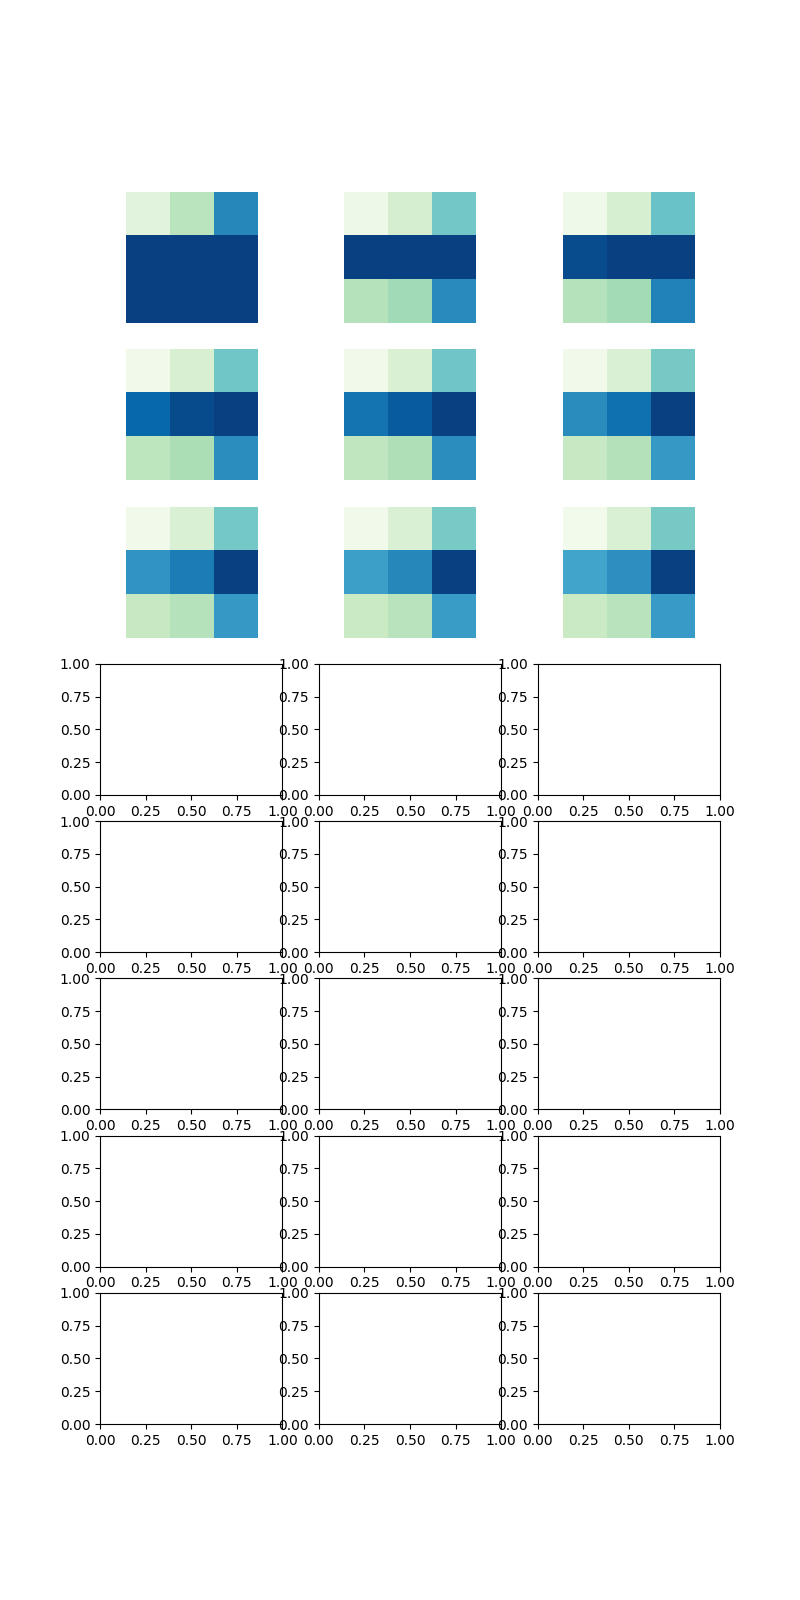

In [14]:
plt.close('all')
fig, ax = plt.subplots(nrows=8,ncols=3, figsize=(8,16))

ii=0

xLabel = ['0%', '10%', '50%'] 
yLabel = ['70um-30min', '110um-30min', '200um-30min', '300um-30min', '70um-60min', '110um-60min', '200um-60min', '300um-60min'] 
for x in range(8):
    for y in range(3):
        thisAx=ax[x, y]
        thisAx.imshow(gasMat[ii], cmap = 'GnBu', vmin=200, vmax=1500, interpolation='nearest') #
        # thisAx.set_axis_off()
        thisAx.set_xticks([])
        thisAx.set_yticks([])
        thisAx.spines['top'].set_visible(False)
        thisAx.spines['right'].set_visible(False)
        thisAx.spines['bottom'].set_visible(False)
        thisAx.spines['left'].set_visible(False)
        # if x == 0:
        #     thisAx.set_title(xLabel[y])
        # if y == 0:
        #     thisAx.set_ylabel(yLabel[x])
        ii=ii+1
fig.tight_layout()
# plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

## PCA

In [103]:
key_df[[f'Pump{i}' for i in range(1, 6)]]

,Pump1,Pump2,Pump3,Pump4,Pump5
0,0,0,0,0,0
1,200,0,0,0,0
2,200,0,0,0,0
3,0,200,0,0,0
4,200,0,0,0,0
5,200,0,0,0,0
6,0,200,0,0,0
7,200,0,0,0,0
8,200,0,0,0,0
9,0,0,200,0,0


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#### Data preview

In [21]:
key_df[[f'px{i}' for i in range(1, 9)]]

,px1,px2,px3,px4,px5,px6,px7,px8
0,2044,3802,2401,2397,3805,2765,2940,3804
1,2041,3807,2409,2398,3803,2758,2948,3807
2,2030,3805,2405,2400,3806,2764,2946,3806
3,2032,3807,2405,2399,3803,2759,2942,3805
4,2025,3806,2405,2402,3808,2756,2941,3807
5,2025,3805,2407,2393,3806,2759,2941,3806
6,2034,3806,2394,2380,3802,2759,2943,3805
7,2031,3805,2394,2391,3805,2759,2938,3806
8,2025,3808,2402,2383,3806,2753,2939,3807
9,2030,3806,2389,2370,3809,2754,2935,3807


In [22]:
key_df['yy']= key_df[[f'Pump{i}' for i in range(1, 6)]].values.argmax(axis=1)
key_df

,px0,px1,px2,px3,px4,px5,px6,px7,px8,resp0,...,resp6,resp7,resp8,Pump1,Pump2,Pump3,Pump4,Pump5,ts,yy
0,1348,2044,3802,2401,2397,3805,2765,2940,3804,0,...,8,-2,0,150,0,0,0,0,2025-04-07 14:56:06,0
1,1346,2041,3807,2409,2398,3803,2758,2948,3807,-2,...,1,6,3,150,0,0,0,0,2025-04-07 14:56:06,0
2,1336,2030,3805,2405,2400,3806,2764,2946,3806,-12,...,7,4,2,0,150,0,0,0,2025-04-07 15:01:06,1
3,1340,2032,3807,2405,2399,3803,2759,2942,3805,-8,...,2,0,1,150,0,0,0,0,2025-04-07 15:06:06,0
4,1338,2025,3806,2405,2402,3808,2756,2941,3807,-10,...,-1,-1,3,0,150,0,0,0,2025-04-07 15:11:06,1
5,1334,2025,3805,2407,2393,3806,2759,2941,3806,-14,...,2,-1,2,150,0,0,0,0,2025-04-07 15:16:06,0
6,1340,2034,3806,2394,2380,3802,2759,2943,3805,-8,...,2,1,1,0,0,150,0,0,2025-04-07 15:21:06,2
7,1343,2031,3805,2394,2391,3805,2759,2938,3806,-5,...,2,-4,2,0,0,150,0,0,2025-04-07 15:21:06,2
8,1332,2025,3808,2402,2383,3806,2753,2939,3807,-16,...,-4,-3,3,150,0,0,0,0,2025-04-07 15:26:06,0
9,1339,2030,3806,2389,2370,3809,2754,2935,3807,-9,...,-3,-7,3,0,0,150,0,0,2025-04-07 15:31:06,2


In [46]:
key_df['yy'].value_counts()[0]

10

#### Plot Array

[1348 2044 3802 2401 2397 3805 2765 2940 3804]
[1346 2041 3807 2409 2398 3803 2758 2948 3807]
[1336 2030 3805 2405 2400 3806 2764 2946 3806]
[1340 2032 3807 2405 2399 3803 2759 2942 3805]
[1338 2025 3806 2405 2402 3808 2756 2941 3807]
[1334 2025 3805 2407 2393 3806 2759 2941 3806]
[1340 2034 3806 2394 2380 3802 2759 2943 3805]
[1343 2031 3805 2394 2391 3805 2759 2938 3806]
[1332 2025 3808 2402 2383 3806 2753 2939 3807]
[1339 2030 3806 2389 2370 3809 2754 2935 3807]
[1351 2046 3808 2368 2356 3807 2745 2927 3807]
[1330 2020 3803 2388 2369 3803 2745 2929 3803]
[1351 2043 3806 2365 2344 3805 2741 2924 3806]
[1351 2042 3802 2358 2347 3802 2742 2925 3803]
[1336 2024 3806 2372 2352 3806 2744 2929 3805]
[1339 2028 3807 2363 2347 3806 2746 2928 3805]
[1344 2034 3807 2352 2328 3804 2733 2923 3807]
[1344 2035 3808 2346 2325 3804 2727 2917 3804]
[1341 2042 3804 2326 2309 3804 2717 2907 3802]
[1345 2042 3805 2318 2304 3806 2723 2909 3804]


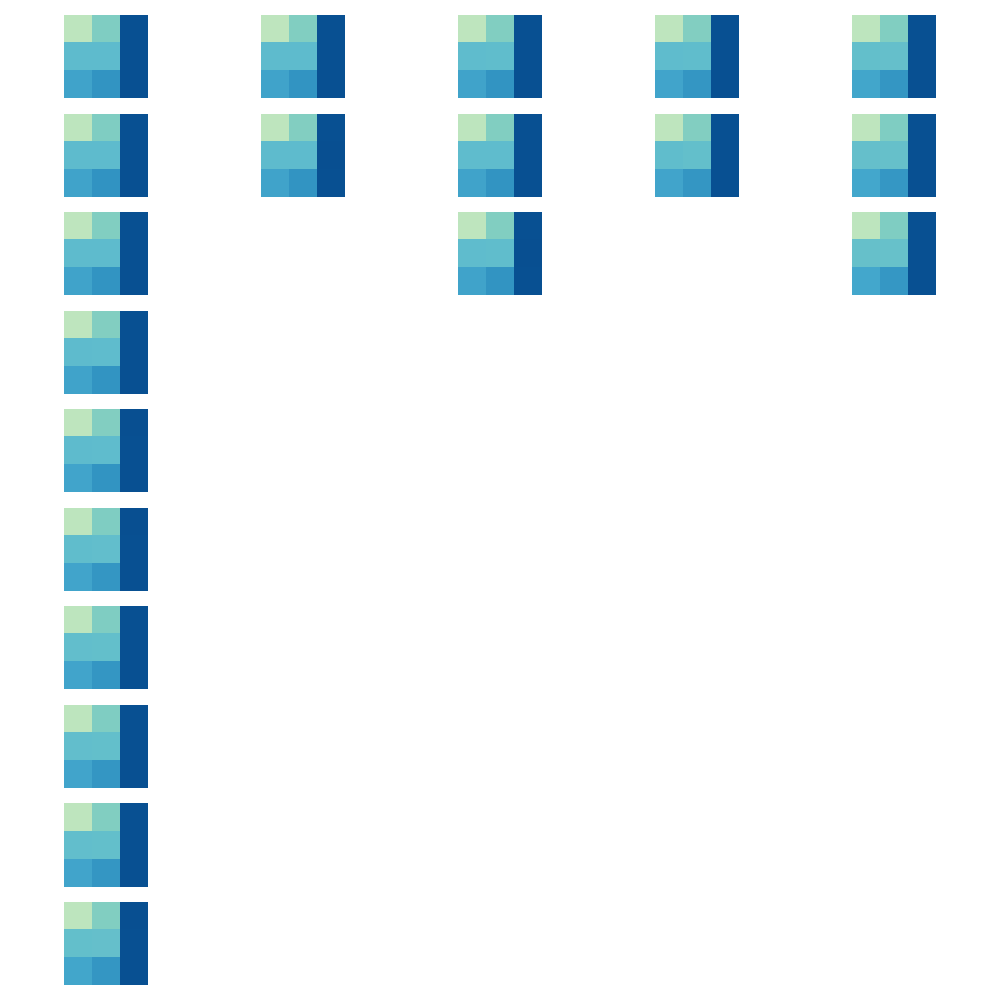

In [49]:
key_df
pltIdd = [0,0,0,0,0,0]
plt.close('all')
fig, ax = plt.subplots(nrows=key_df['yy'].value_counts()[0],ncols=key_df['yy'].max()+1, figsize=(10,10))
for index, row in key_df.iterrows():
    # print(index, row['yy'])
    thisAx=ax[pltIdd[row['yy']],row['yy']]
    pltIdd[row['yy']] = pltIdd[row['yy']]+1
    gasMat = row[[f'px{i}' for i in range(9)]].to_numpy()
    print(gasMat)
    gasMat = np.reshape(gasMat, (-1,3)).astype(int)
    thisAx.imshow(gasMat, cmap = 'GnBu', vmin=200, vmax=4000, interpolation='nearest') #

for i in range(key_df['yy'].value_counts()[0]):
    for j in range(key_df['yy'].max()+1):
        thisAx=ax[i,j]
        thisAx.set_axis_off()
fig.tight_layout()
# plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

#### Cal

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(key_df[[f'px{i}' for i in range(1, 9)]])

# Apply PCA to reduce dimensions
pca = PCA(n_components=3)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# label_mapping = {label: idx for idx, label in enumerate(y.unique())}
# y_encoded = y.map(label_mapping)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
# pca_df['label'] = key_df[[f'Pump{i}' for i in range(1, 6)]]*3
# Split the data into training and testing sets
pca_df['yy'] = key_df['yy']
pca_df

,PC1,PC2,PC3,yy
0,1.065853,-2.425423,0.583673,0
1,2.097019,-0.259414,2.023957,0
2,2.390190,-0.382957,-0.244363,1
3,1.691169,-0.759389,0.651000,0
4,2.463938,1.049629,-0.972894,1
5,2.097054,-0.184112,-0.881700,0
6,1.101101,-1.254412,0.895447,2
7,1.490421,-0.415703,-0.073845,2
8,1.917757,1.375335,-0.318442,0
9,1.327694,1.633472,-0.777151,2


In [51]:
color_dict = {
    0: "blue",
    1: "red",
    2: "green",
    3: "orange",
    4: "purple",
    5: "cyan",
}


#### Plot

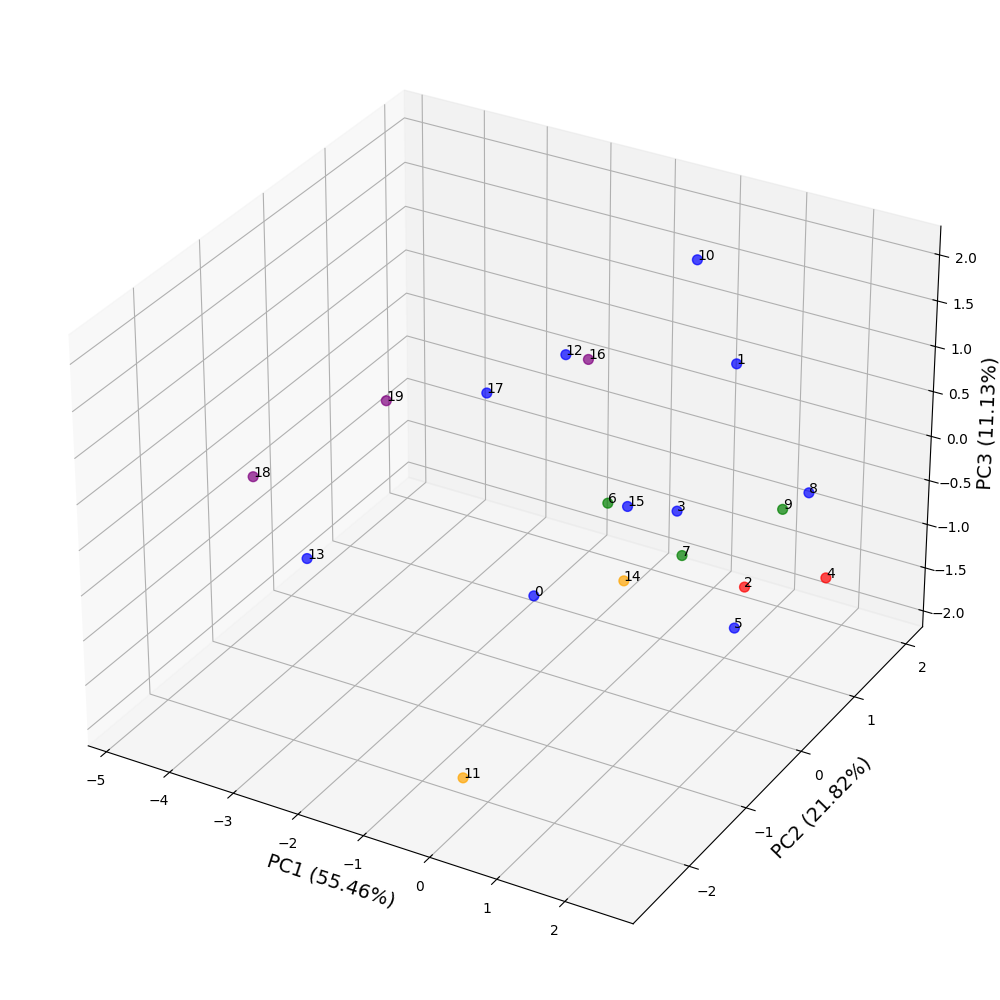

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming `pca_df` is a DataFrame with columns 'PC1', 'PC2', and 'PC3'
# And `pca` is a fitted PCA model with `explained_variance_ratio_`

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter using matplotlib
ax.scatter(
    pca_df['PC1'],  # X-axis
    pca_df['PC2'],  # Y-axis
    pca_df['PC3'],  # Z-axis
    c=pca_df['yy'].map(color_dict),       # Color of points
    s=50,           # Size of points
    alpha=0.7       # Transparency
)
for index, row in pca_df.iterrows():
    # print(row)
    # ax.text(9, 0, 0, "red", color='red')
    ax.text(row['PC1'], row['PC2'], row['PC3'], index)
# Set axis labels with explained variance ratios
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)", fontsize=14)

# Optional: Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

In [107]:
color_list = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
]


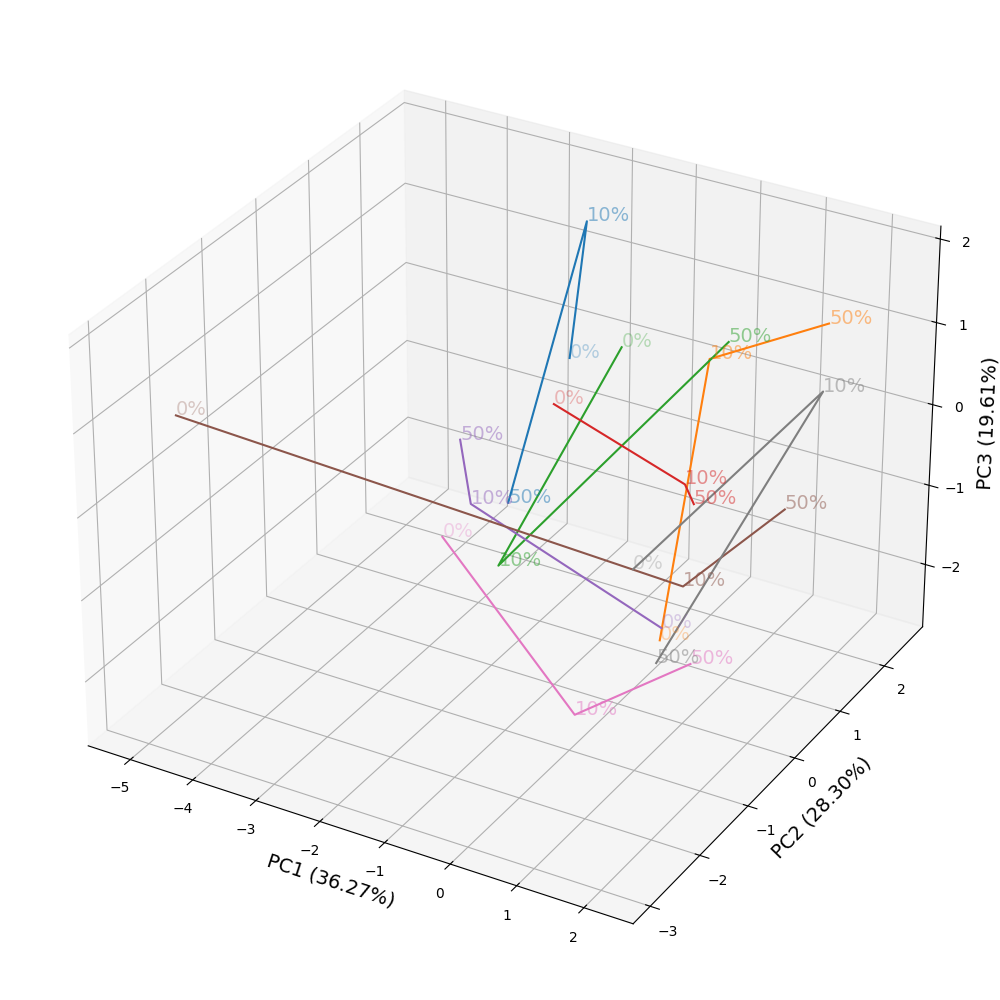

In [108]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.interpolate import splprep, splev

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
thisAx = ax
for memb in range(8):
    thisAx.plot(X_pca.T[0][[memb, memb+8, memb+8*2]], X_pca.T[1][[memb, memb+8, memb+8*2]], X_pca.T[2][[memb, memb+8, memb+8*2]],color=color_list[memb])
    # thisAx.text(X_pca.T[0][memb],X_pca.T[1][memb],X_pca.T[2][memb], yLabel[memb],color=color_list[memb], size=14)
    thisAx.text(X_pca.T[0][memb],X_pca.T[1][memb],X_pca.T[2][memb], '0%',color=color_list[memb], size=14, alpha=0.3)
    thisAx.text(X_pca.T[0][memb+8],X_pca.T[1][memb+8],X_pca.T[2][memb+8], '10%',color=color_list[memb], size=14, alpha=0.5)
    thisAx.text(X_pca.T[0][memb+8*2],X_pca.T[1][memb+8*2],X_pca.T[2][memb+8*2], '50%',color=color_list[memb], size=14, alpha=0.5)

    # # Fit a B-spline to the data
    # tck, u = splprep([X_pca.T[0][[memb, memb+8, memb+8*2]], X_pca.T[1][[memb, memb+8, memb+8*2]], X_pca.T[2][[memb, memb+8, memb+8*2]]], s=2)  # 's' is the smoothing factor (adjustable)
    # u_fine = np.linspace(0, 1, 100)  # Fine parameterization for a smooth curve
    # pc1_smooth, pc2_smooth, pc3_smooth = splev(u_fine, tck)
    
    # # Plot the smooth curve
    # thisAx.plot(pc1_smooth, pc2_smooth, pc3_smooth, color=color, linewidth=2, alpha=0.8)# , label=f"{label} Trend Curve")
    # thisAx.text(subset['PC1'].iloc[0], subset['PC2'].iloc[0], subset['PC3'].iloc[0], label, color=color, size=20)



thisAx.set_xlabel(f"PC{1} ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
thisAx.set_ylabel(f"PC{2} ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
thisAx.set_zlabel(f"PC{3} ({pca.explained_variance_ratio_[2]*100:.2f}%)", fontsize=14)
fig.tight_layout()

In [82]:
y=pca_df['label']

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.interpolate import splprep, splev

label_mapping = {label: idx for idx, label in enumerate(y.unique())}

y_encoded = y.map(label_mapping)
alphaAry = dfLabel.to_numpy().max(axis=1)
alphaAryi = 0
# Close any existing plots
plt.close('all')

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
thisAx = ax
# Scatter plot of the PCA-transformed data in 3D with nonlinear trend curves
for label, color in zip(label_mapping.keys(), ['blue', 'green', 'red', 'orange', 'purple']):
    subset = pca_df[pca_df['label'] == label]
    alphaVec = alphaAry[alphaAryi:alphaAryi + len(subset['PC1'])]
    alphaAryi = alphaAryi + len(subset['PC1'])
    # Scatter plot
    for i in range(len(subset['PC1'])):
        thisAx.scatter(
            subset['PC1'].iloc[i], 
            subset['PC2'].iloc[i], 
            subset['PC3'].iloc[i], 
            color=color, 
            alpha=alphaVec[i],  # Set transparency for each point
            s=100
        )
    

    # thisAx.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=label, alpha=alphaVec, color=color, s=100)
    
    # Prepare data for spline fitting (sorted by PC1 for smoothness)
    data = subset[['PC1', 'PC2', 'PC3']].sort_values(by='PC1').to_numpy()
    pc1, pc2, pc3 = data[:, 0], data[:, 1], data[:, 2]
    
    # Fit a B-spline to the data
    tck, u = splprep([pc1, pc2, pc3], s=2)  # 's' is the smoothing factor (adjustable)
    u_fine = np.linspace(0, 1, 100)  # Fine parameterization for a smooth curve
    pc1_smooth, pc2_smooth, pc3_smooth = splev(u_fine, tck)
    
    # Plot the smooth curve
    thisAx.plot(pc1_smooth, pc2_smooth, pc3_smooth, color=color, linewidth=2, alpha=0.8)# , label=f"{label} Trend Curve")
    thisAx.text(subset['PC1'].iloc[0], subset['PC2'].iloc[0], subset['PC3'].iloc[0], label, color=color, size=20)

# Customize the plot
#title = "3D PCA with SVM Decision Boundary"
thisAx.set_title(title, fontsize=16)

thisAx.set_xlabel(f"PC{1} ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
thisAx.set_ylabel(f"PC{2} ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
thisAx.set_zlabel(f"PC{3} ({pca.explained_variance_ratio_[2]*100:.2f}%)", fontsize=14)
# thisAx.legend(title="Label", fontsize=12)

thisAx.azim = -110
thisAx.dist = 0
thisAx.elev = -160
# Add a grid
thisAx.grid(which='major', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'dfLabel' is not defined

In [119]:
df

,px0,px1,px2,px3,px4,px5,px6,px7,px8,resp0,...,mu4,var4,mu5,var5,mu6,var6,mu7,var7,mu8,var8
datetime,,,,,,,,,,,,,,,,,,,,,
2025-04-07 14:50:17,1348,2042,3804,2410,2401,3802,2757,2942,3804,0,...,2401,9999,3802,9999,2757,9999,2942,9999,3804,9999
2025-04-07 14:50:18,1348,2046,3805,2402,2396,3806,2763,2945,3804,0,...,2401,9999,3802,9999,2757,9999,2942,9999,3804,9999
2025-04-07 14:50:19,1348,2041,3806,2410,2399,3807,2759,2941,3806,0,...,2401,9999,3802,9999,2757,9999,2942,9999,3804,9999
2025-04-07 14:50:20,1347,2044,3806,2406,2397,3804,2761,2945,3803,-1,...,2401,9999,3802,9999,2757,9999,2942,9999,3804,9999
2025-04-07 14:50:21,1346,2041,3805,2410,2399,3804,2757,2945,3805,-2,...,2401,9999,3802,9999,2757,9999,2942,9999,3804,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07 16:16:51,1344,2040,3806,2315,2308,3808,2716,2905,3805,-4,...,2401,9999,3802,9999,2757,9999,2942,9999,3804,9999
2025-04-07 16:16:51,1343,2036,3805,2323,2302,3804,2715,2907,3807,-5,...,2401,9999,3802,9999,2757,9999,2942,9999,3804,9999
2025-04-07 16:16:52,1342,2037,3807,2322,2306,3807,2716,2904,3807,-6,...,2401,9999,3802,9999,2757,9999,2942,9999,3804,9999


## Baseline removal 

In [22]:
for i in range(9):
    df[f'mu{i}'] = df[f'px{i}'].iloc[0]
    df[f'var{i}'] = 9999
    
def baselineEst(x):
    return 1

i=0
df[[f'px{i}', f'mu{i}', f'var{i}']].rolling(5).apply(baselineEst)

windowedSiz = 10

i=0
for value in df[f'px{i}']:
    print(value)
# for i in range(windowedSiz,100):
#     for px_i in range(1):
#         likelihoodMu, likelihoodVar = df.iloc[i-windowedSiz:i][f'px{px_i}'].mean(), df.iloc[i-windowedSiz:i][f'px{px_i}'].var()
#         priorMu, priouVar = df.iloc[i-1][f'mu{px_i}'], df.iloc[i-1][f'var{px_i}']
#         df.at[i,f'mu{px_i}'], df.at[i,f'var{px_i}'] = likelihoodMu, likelihoodVar
#         print(i, px_i, '\t', likelihoodMu, priorMu,  df.at[i,f'mu{px_i}'], '\t',likelihoodVar, likelihoodMu, df.at[i,f'var{px_i}'])

1348.0
1348.0
1348.0
1347.0
1346.0
1348.0
1347.0
1351.0
1345.0
1348.0
1345.0
1348.0
1347.0
1347.0
1350.0
1350.0
1351.0
1351.0
1352.0
1350.0
1352.0
1352.0
1354.0
1352.0
1350.0
1351.0
1349.0
1349.0
1348.0
1351.0
1344.0
1347.0
1344.0
1346.0
1347.0
1345.0
1344.0
1342.0
1342.0
1340.0
1346.0
1342.0
1340.0
1339.0
1339.0
1340.0
1343.0
1341.0
1338.0
1337.0
1340.0
1339.0
1340.0
1337.0
1337.0
1339.0
1337.0
1337.0
1337.0
1336.0
1337.0
1339.0
1336.0
1338.0
1336.0
1338.0
1337.0
1337.0
1334.0
1338.0
1338.0
1337.0
1340.0
1338.0
1340.0
1336.0
1334.0
1336.0
1336.0
1335.0
1339.0
1338.0
1340.0
1336.0
1334.0
1338.0
1339.0
1338.0
1335.0
1336.0
1340.0
1335.0
1338.0
1338.0
1337.0
1337.0
1338.0
1339.0
1338.0
1336.0
1338.0
1338.0
1338.0
1339.0
1339.0
1339.0
1338.0
1339.0
1337.0
1338.0
1337.0
1336.0
1338.0
1340.0
1337.0
1342.0
1337.0
1340.0
1337.0
1338.0
1337.0
1339.0
1337.0
1340.0
1339.0
1341.0
1339.0
1337.0
1342.0
1338.0
1338.0
1338.0
1341.0
1339.0
1341.0
1338.0
1341.0
1338.0
1339.0
1339.0
1338.0
1338.0
1339.0

In [26]:
df.at[i,f'mu{px_i}']

0.0

In [7]:
df

,px0,px1,px2,px3,px4,px5,px6,px7,px8,mu0,...,mu4,var4,mu5,var5,mu6,var6,mu7,var7,mu8,var8
datetime,,,,,,,,,,,,,,,,,,,,,
2025-04-07 14:50:17,1348.0,2042.0,3804.0,2410.0,2401.0,3802.0,2757.0,2942.0,3804.0,1348.0,...,2401.0,9999.0,3802.0,9999.0,2757.0,9999.0,2942.0,9999.0,3804.0,9999.0
2025-04-07 14:50:18,1348.0,2046.0,3805.0,2402.0,2396.0,3806.0,2763.0,2945.0,3804.0,1348.0,...,2401.0,9999.0,3802.0,9999.0,2757.0,9999.0,2942.0,9999.0,3804.0,9999.0
2025-04-07 14:50:19,1348.0,2041.0,3806.0,2410.0,2399.0,3807.0,2759.0,2941.0,3806.0,1348.0,...,2401.0,9999.0,3802.0,9999.0,2757.0,9999.0,2942.0,9999.0,3804.0,9999.0
2025-04-07 14:50:20,1347.0,2044.0,3806.0,2406.0,2397.0,3804.0,2761.0,2945.0,3803.0,1348.0,...,2401.0,9999.0,3802.0,9999.0,2757.0,9999.0,2942.0,9999.0,3804.0,9999.0
2025-04-07 14:50:21,1346.0,2041.0,3805.0,2410.0,2399.0,3804.0,2757.0,2945.0,3805.0,1348.0,...,2401.0,9999.0,3802.0,9999.0,2757.0,9999.0,2942.0,9999.0,3804.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1337.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1337.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1337.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


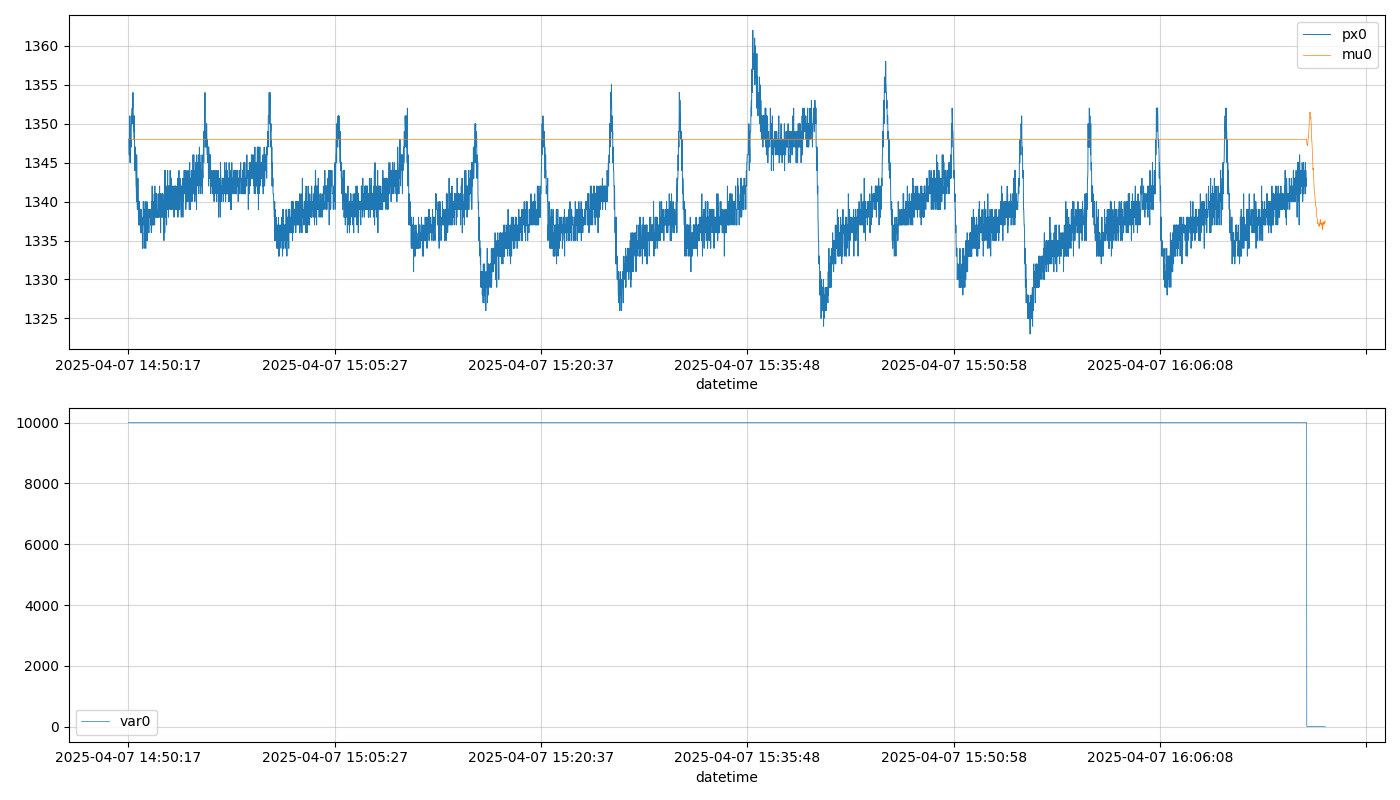

In [6]:
plt.close('all')
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(14,8))

thisAx=ax[0]
for i in range(1):
    df.plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'
    df.plot(ax=thisAx, y=f'mu{i}', lw=0.5)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
# thisAx.yaxis.set_major_locator(MultipleLocator(100))
# thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
# thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))

thisAx=ax[1]
for i in range(1):
    # df.plot(ax=thisAx, y=f'px{i}', lw=0.7) #, alpha = (i+1)/9, color='black'
    df.plot(ax=thisAx, y=f'var{i}', lw=0.5)

thisAx.grid(which='minor', alpha=0.3)
thisAx.grid(which='major', alpha=0.5)
# thisAx.yaxis.set_major_locator(MultipleLocator(100))
# thisAx.xaxis.set_major_locator(MultipleLocator(1/(12*24)))
# thisAx.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.tight_layout()

In [97]:
import pandas as pd

# Sample DataFrame with 9 sensors
data = {
    'Sensor1': [1, 2, 3, 4, 5],
    'Sensor2': [5, 4, 3, 2, 1],
    'Sensor3': [10, 20, 30, 40, 50],
    'Sensor4': [2, 3, 4, 5, 6],
    'Sensor5': [5, 6, 7, 8, 9],
    'Sensor6': [1, 1, 1, 1, 1],
    'Sensor7': [3, 3, 3, 3, 3],
    'Sensor8': [4, 4, 4, 4, 4],
    'Sensor9': [2, 2, 2, 2, 2]
}
df_testing = pd.DataFrame(data)

# Define a custom function to calculate mean and variance
def custom_stats(x):
    mean = x.mean()
    variance = x.var()
    return pd.Series({'mean': mean, 'variance': variance})

# Apply rolling window and custom function to all sensor columns
window_size = 3
result = df_testing.rolling(window=window_size).apply(lambda x: custom_stats(x), raw=False)

# Display the result
print(result)

TypeError: cannot convert the series to <class 'float'>

## Multi test

In [60]:
#Testing schedule
colnames_testing = ['time', 'filter', 'liquid','conc']
df_testing = pd.read_csv(testingCsvFile, names=colnames_testing, header=None, sep=' ' )
df_testing['datetime'] = pd.to_datetime(str(df.index[0].date())+ ' '+ df_testing['time'], format='%Y-%m-%d %H:%M')
# df_testing = df_testing.set_index(['datetime'])
# df_testing = df_testing.drop('time', axis=1)
df_testing

,time,filter,liquid,conc,datetime
0,17:03,303,A,0.0,2025-03-22 17:03:00
1,17:35,303,A,0.5,2025-03-22 17:35:00
2,17:41,303,A,0.0,2025-03-22 17:41:00
3,17:48,303,A,1.0,2025-03-22 17:48:00
4,17:54,303,A,0.0,2025-03-22 17:54:00
5,18:02,303,T,0.5,2025-03-22 18:02:00
6,18:08,303,T,0.0,2025-03-22 18:08:00
7,18:14,303,T,1.0,2025-03-22 18:14:00
8,18:20,303,T,0.0,2025-03-22 18:20:00


In [61]:
keyFrame = []
for idx, testTime in df_testing.iterrows():
    keyFrame.append(df.loc[testTime['datetime']+timedelta(seconds=60):testTime['datetime']+timedelta(seconds=120)].mean().to_numpy())

In [62]:
gasMat=[]
for i in range(len(keyFrame)):
    gasMat.append(np.reshape(keyFrame[i], (-1,3)).astype(int))

In [63]:
gasMat

[array([[ 356,  605, 1193],
        [2426, 2555, 2853],
        [1515, 1575, 1974]]),
 array([[ 262,  447,  880],
        [1503, 1637, 2059],
        [ 631,  712, 1184]]),
 array([[ 252,  429,  908],
        [1446, 1557, 2019],
        [ 626,  706, 1218]]),
 array([[ 250,  427,  887],
        [1334, 1450, 1919],
        [ 592,  671, 1171]]),
 array([[ 246,  419,  892],
        [1279, 1386, 1873],
        [ 581,  660, 1171]]),
 array([[ 245,  418,  868],
        [1180, 1292, 1778],
        [ 555,  633, 1124]]),
 array([[ 242,  412,  871],
        [1143, 1245, 1744],
        [ 548,  625, 1124]]),
 array([[ 241,  409,  863],
        [1093, 1191, 1692],
        [ 536,  612, 1106]]),
 array([[ 237,  404,  870],
        [1071, 1160, 1674],
        [ 532,  607, 1112]])]

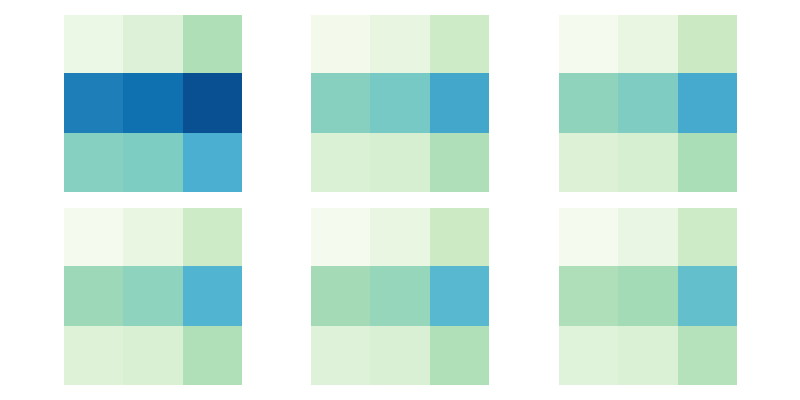

In [64]:
plt.close('all')
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(8,4))

ii=0

xLabel = ['0%', '50%', '100%'] 
yLabel = ['A', 'T'] 
for x in range(2):
    for y in range(3):
        thisAx=ax[x, y]
        thisAx.imshow(gasMat[ii], cmap = 'GnBu', vmin=200, vmax=3000, interpolation='nearest') #
        # thisAx.set_axis_off()
        thisAx.set_xticks([])
        thisAx.set_yticks([])
        thisAx.spines['top'].set_visible(False)
        thisAx.spines['right'].set_visible(False)
        thisAx.spines['bottom'].set_visible(False)
        thisAx.spines['left'].set_visible(False)
        # if x == 0:
        #     thisAx.set_title(xLabel[y])
        # if y == 0:
        #     thisAx.set_ylabel(yLabel[x])
        ii=ii+1
fig.tight_layout()
# plt.savefig('exportSvg/pict.svg', bbox_inches='tight', pad_inches = 0)

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(keyFrame)

# Apply PCA to reduce dimensions
pca = PCA(n_components=3)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# label_mapping = {label: idx for idx, label in enumerate(y.unique())}
# y_encoded = y.map(label_mapping)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = df_testing['conc']
pca_df['label_liquid'] = df_testing['liquid']
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
pca_df

,PC1,PC2,PC3,label,label_liquid
0,8.212730,-0.216368,-0.011681,0.0,A
1,0.081490,0.698933,-0.208320,0.5,A
2,-0.143840,0.389912,0.242793,0.0,A
3,-0.662278,0.214519,0.031795,1.0,A
4,-0.903319,0.037960,0.145294,0.0,A
5,-1.364204,-0.107789,-0.117412,0.5,T
6,-1.547074,-0.234407,-0.017835,0.0,T
7,-1.785444,-0.342331,-0.094116,1.0,T
8,-1.888061,-0.440430,0.029482,0.0,T


In [67]:
pca_df[pca_df['label_liquid']=='A']

,PC1,PC2,PC3,label,label_liquid
0,8.212730,-0.216368,-0.011681,0.0,A
1,0.081490,0.698933,-0.208320,0.5,A
2,-0.143840,0.389912,0.242793,0.0,A
3,-0.662278,0.214519,0.031795,1.0,A
4,-0.903319,0.037960,0.145294,0.0,A


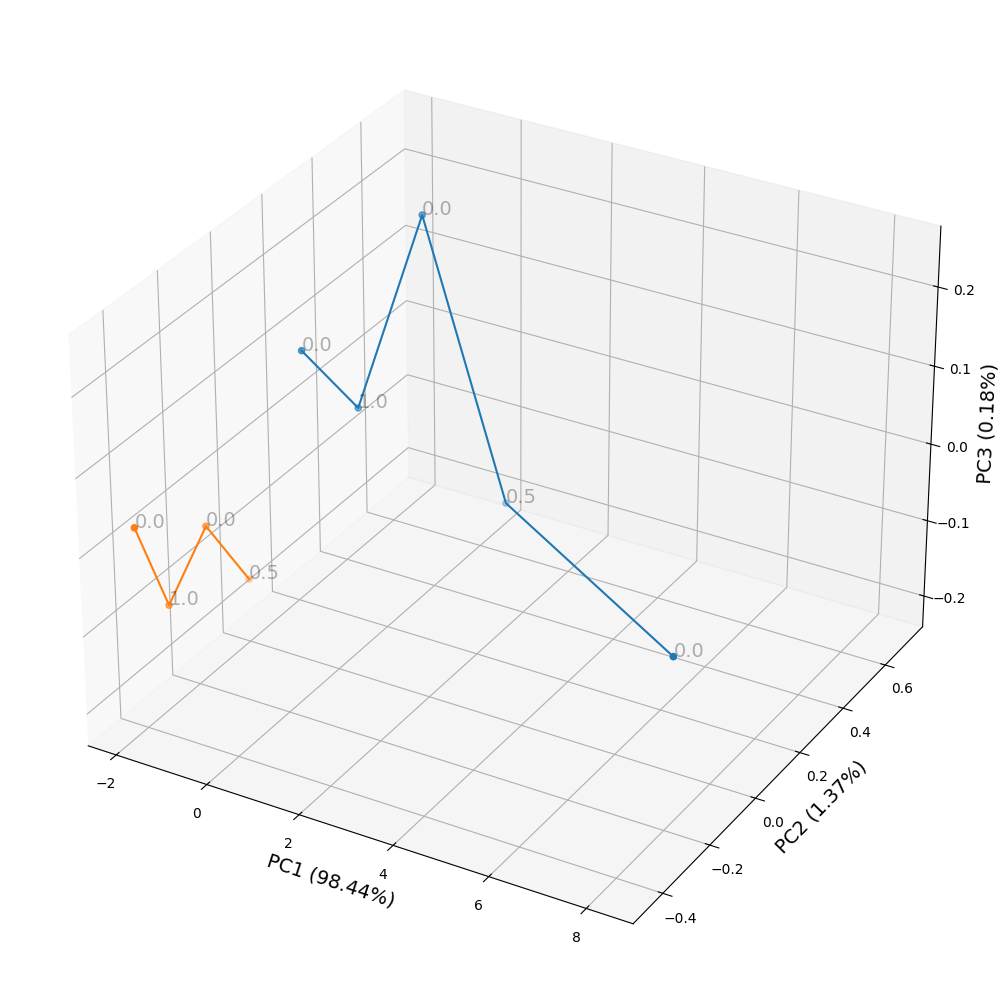

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.interpolate import splprep, splev

liquidVec = ['A', 'T'] 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
thisAx = ax
# thisAx.scatter3D(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['label']) #
for liquidId in range(2):
    thisDf = pca_df[pca_df['label_liquid']==liquidVec[liquidId]]
    thisAx.plot(thisDf['PC1'], thisDf['PC2'], thisDf['PC3'])  #, c=thisDf['label']
    thisAx.scatter(thisDf['PC1'], thisDf['PC2'], thisDf['PC3'])
    for index, row in thisDf.iterrows():
        thisAx.text(row['PC1'], row['PC2'], row['PC3'], row['label'], size=14, alpha=0.3)
# for memb in range(2):
    # thisAx.plot(X_pca.T[0][[memb, memb+8, memb+8*2]], X_pca.T[1][[memb, memb+8, memb+8*2]], X_pca.T[2][[memb, memb+8, memb+8*2]],color=color_list[memb])
    # thisAx.text(X_pca.T[0][memb],X_pca.T[1][memb],X_pca.T[2][memb], '0%',color=color_list[memb], size=14, alpha=0.3)
    # thisAx.text(X_pca.T[0][memb+8],X_pca.T[1][memb+8],X_pca.T[2][memb+8], '10%',color=color_list[memb], size=14, alpha=0.5)
    # thisAx.text(X_pca.T[0][memb+8*2],X_pca.T[1][memb+8*2],X_pca.T[2][memb+8*2], '50%',color=color_list[memb], size=14, alpha=0.5)



thisAx.set_xlabel(f"PC{1} ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
thisAx.set_ylabel(f"PC{2} ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
thisAx.set_zlabel(f"PC{3} ({pca.explained_variance_ratio_[2]*100:.2f}%)", fontsize=14)
fig.tight_layout()

## 3D plot for paper

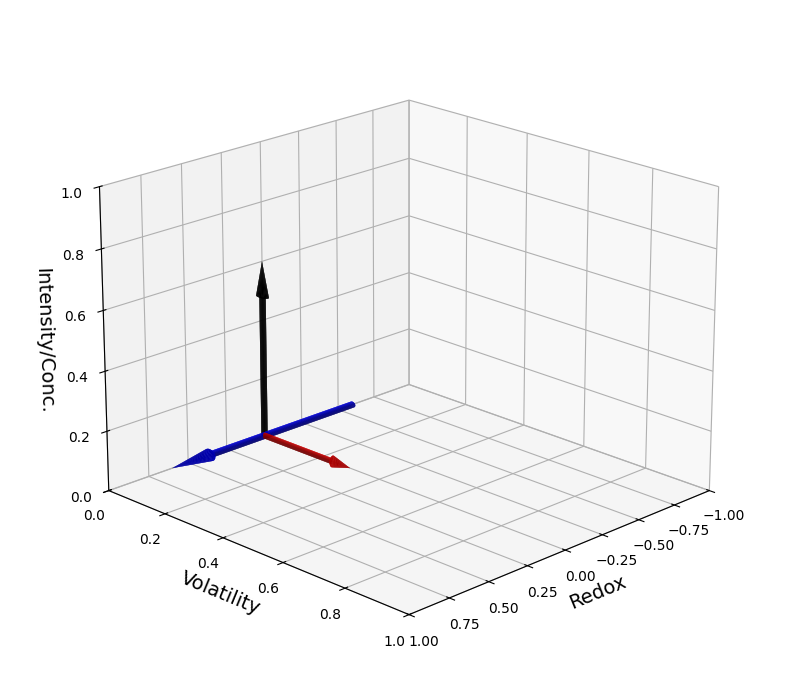

In [101]:
plt.close('all')
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
thisAx = ax

# thisAx.quiver([-1],[0],[0],[2],[0],[0],linewidth=2, label='Arrow', colors='r')
# thisAx.quiver([0],[0],[0],[0],[1],[0],linewidth=2, label='Arrow', colors='b')
# thisAx.quiver([0],[0],[0],[0],[0],[1],linewidth=2, label='Arrow', colors='black')
arrow3d(ax, length=1.2, width=0.01, head=0.2, headwidth=2, offset=[-0.6,0,0],theta_x=-90, theta_z=-90,  color="blue")
arrow3d(ax, length=0.6, width=0.01, head=0.2, headwidth=2, offset=[0,0,0],theta_x=0,  color="black")
arrow3d(ax, length=0.3, width=0.01, head=0.2, headwidth=2, offset=[0,0,0],theta_x=-90,  color="red")


# thisAx.set_title("Conceptual framework of Odor Map")
thisAx.set_xlim(-1, 1)
thisAx.set_ylim(0, 1)
thisAx.set_zlim(0, 1)

thisAx.set_xlabel(f"Redox", fontsize=14)
thisAx.set_ylabel(f"Volatility", fontsize=14)
thisAx.set_zlabel(f"Intensity/Conc.", fontsize=14)

thisAx.view_init(elev=20, azim=45, roll=0)
fig.tight_layout()
plt.savefig('exportSvg/odorMap.svg', bbox_inches='tight', pad_inches = 0.5)

In [46]:
from mpl_toolkits.mplot3d import Axes3D


def arrow3d(ax, length=1, width=0.05, head=0.2, headwidth=2,
                theta_x=0, theta_z=0, offset=(0,0,0), **kw):
    w = width
    h = head
    hw = headwidth
    theta_x = np.deg2rad(theta_x)
    theta_z = np.deg2rad(theta_z)

    a = [[0,0],[w,0],[w,(1-h)*length],[hw*w,(1-h)*length],[0,length]]
    a = np.array(a)

    r, theta = np.meshgrid(a[:,0], np.linspace(0,2*np.pi,30))
    z = np.tile(a[:,1],r.shape[0]).reshape(r.shape)
    x = r*np.sin(theta)
    y = r*np.cos(theta)

    rot_x = np.array([[1,0,0],[0,np.cos(theta_x),-np.sin(theta_x) ],
                      [0,np.sin(theta_x) ,np.cos(theta_x) ]])
    rot_z = np.array([[np.cos(theta_z),-np.sin(theta_z),0 ],
                      [np.sin(theta_z) ,np.cos(theta_z),0 ],[0,0,1]])

    b1 = np.dot(rot_x, np.c_[x.flatten(),y.flatten(),z.flatten()].T)
    b2 = np.dot(rot_z, b1)
    b2 = b2.T+np.array(offset)
    x = b2[:,0].reshape(r.shape); 
    y = b2[:,1].reshape(r.shape); 
    z = b2[:,2].reshape(r.shape); 
    ax.plot_surface(x,y,z, **kw)